In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
#collecting data

employees_df = pd.read_csv('data/employee_data.csv', parse_dates=True)
engagement_survey_df = pd.read_csv('data/employee_engagement_survey_data.csv', parse_dates=True)
training_dev_df = pd.read_csv('data/training_and_development_data.csv', parse_dates=True)

In [3]:
for df in [employees_df, engagement_survey_df, training_dev_df]:
    cols = [var for var in df.columns if 'DATE' in var.upper()]
    df.loc[:, cols] = df.loc[:, cols].apply(pd.to_datetime)

C:\Users\obaliuta\AppData\Local\Temp\ipykernel_3596\1500181101.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, cols] = df.loc[:, cols].apply(pd.to_datetime)
C:\Users\obaliuta\AppData\Local\Temp\ipykernel_3596\1500181101.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.loc[:, cols] = df.loc[:, cols].apply(pd.to_datetime)
C:\Users\obaliuta\AppData\Local\Temp\ipykernel_3596\1500181101.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or

In [4]:
for df in [employees_df, engagement_survey_df, training_dev_df]:
    display(df.head(5))
    print(df.columns)
    print(df.shape)
    display(df.info())

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20,NaT,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,2023-02-11,NaT,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,2018-12-10,NaT,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,2021-06-21,NaT,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,2019-06-29,NaT,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')
(3000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate       

None

,Employee ID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score
0,1001,2022-10-10,2,5,5
1,1002,2023-03-08,4,5,3
2,1003,2023-03-01,2,5,2
3,1004,2023-07-30,3,5,3
4,1005,2023-06-19,2,4,5


Index(['Employee ID', 'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score'],
      dtype='object')
(3000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Employee ID              3000 non-null   int64         
 1   Survey Date              3000 non-null   datetime64[ns]
 2   Engagement Score         3000 non-null   int64         
 3   Satisfaction Score       3000 non-null   int64         
 4   Work-Life Balance Score  3000 non-null   int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 117.3 KB


None

,Employee ID,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,1001,2022-09-21,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,2023-07-19,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,2023-02-24,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,2023-01-12,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,2023-05-12,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99


Index(['Employee ID', 'Training Date', 'Training Program Name',
       'Training Type', 'Training Outcome', 'Location', 'Trainer',
       'Training Duration(Days)', 'Training Cost'],
      dtype='object')
(3000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Employee ID              3000 non-null   int64         
 1   Training Date            3000 non-null   datetime64[ns]
 2   Training Program Name    3000 non-null   object        
 3   Training Type            3000 non-null   object        
 4   Training Outcome         3000 non-null   object        
 5   Location                 3000 non-null   object        
 6   Trainer                  3000 non-null   object        
 7   Training Duration(Days)  3000 non-null   int64         
 8   Training Cost            3000 non-null   float64       
dtypes: 

None

In [5]:
max(engagement_survey_df['Employee ID'].value_counts().sort_values(ascending=False))

1

each employee has only 1 survey, so it can be merged to employees df as 1:1

In [6]:
employees_df = employees_df.merge(engagement_survey_df, left_on ='EmpID', right_on ='Employee ID', how ='left')

employees_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate                    1533 non-null   datetime64[ns]
 5   Title                       3000 non-null   object        
 6   Supervisor                  3000 non-null   object        
 7   ADEmail                     3000 non-null   object        
 8   BusinessUnit                3000 non-null   object        
 9   EmployeeStatus              3000 non-null   object        
 10  EmployeeType                3000 non-null   object        
 11  PayZone                     3000 non-null   object      

In [7]:
max(training_dev_df['Employee ID'].value_counts().sort_values(ascending=False))

1

there is also 1 training per employee (which is strange but this is what the data says) - can be merged to employees as 1:1

In [8]:
df_merged = (employees_df.merge(training_dev_df, left_on='EmpID', right_on='Employee ID', how='left')
             .drop(columns=['Employee ID_x', 'Employee ID_y']))

display(df_merged.head(5))

df_merged.info()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Location,Trainer,Training Duration(Days),Training Cost
0,3427,Uriah,Bridges,2019-09-20,NaT,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,2,3,2023-07-15,Leadership Development,Internal,Failed,South Marisa,Taylor Rodriguez,2,606.11
1,3428,Paula,Small,2023-02-11,NaT,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,1,5,2022-09-12,Customer Service,External,Incomplete,Tammieville,Kelly Patterson DDS,4,673.02
2,3429,Edward,Buck,2018-12-10,NaT,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,2,1,2022-08-13,Leadership Development,External,Failed,East Roberthaven,Taylor Thomas,2,413.28
3,3430,Michael,Riordan,2021-06-21,NaT,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,5,4,2022-12-15,Project Management,External,Completed,Garzatown,Holly Elliott,3,663.78
4,3431,Jasmine,Onque,2019-06-29,NaT,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,5,3,2023-07-13,Technical Skills,External,Failed,Lake Meganville,Donald Martinez,5,399.03


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   FirstName                   3000 non-null   object        
 2   LastName                    3000 non-null   object        
 3   StartDate                   3000 non-null   datetime64[ns]
 4   ExitDate                    1533 non-null   datetime64[ns]
 5   Title                       3000 non-null   object        
 6   Supervisor                  3000 non-null   object        
 7   ADEmail                     3000 non-null   object        
 8   BusinessUnit                3000 non-null   object        
 9   EmployeeStatus              3000 non-null   object        
 10  EmployeeType                3000 non-null   object        
 11  PayZone                     3000 non-null   object      

In [9]:
df_merged['LeftCompany'] = df_merged.ExitDate.apply(lambda x: 0 if pd.isna(x) else 1)

# Distributions

In [10]:
numeric_cols = df_merged.select_dtypes(include='number').columns

numeric_cols = [var for var in numeric_cols if var != 'EmpID' and var != 'LocationCode']

numeric_cols

['Current Employee Rating',
 'Engagement Score',
 'Satisfaction Score',
 'Work-Life Balance Score',
 'Training Duration(Days)',
 'Training Cost',
 'LeftCompany']

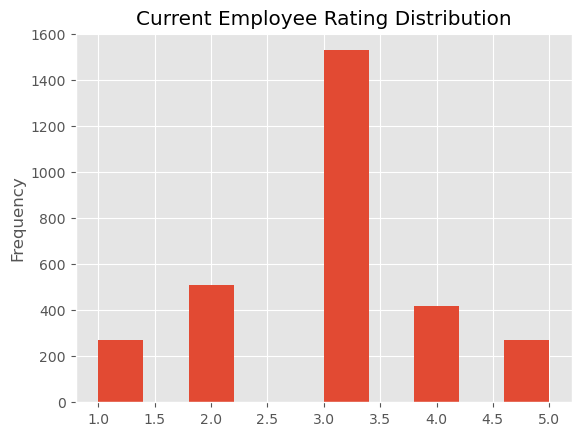

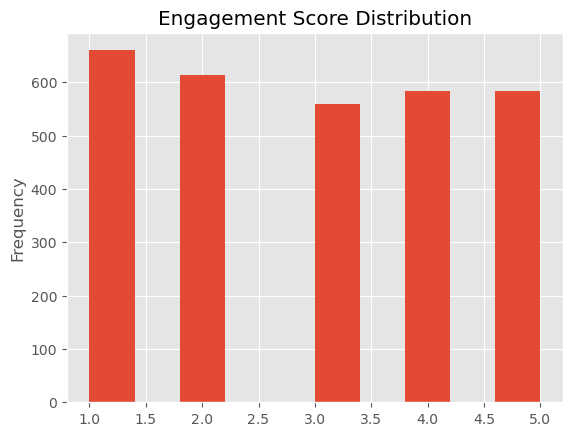

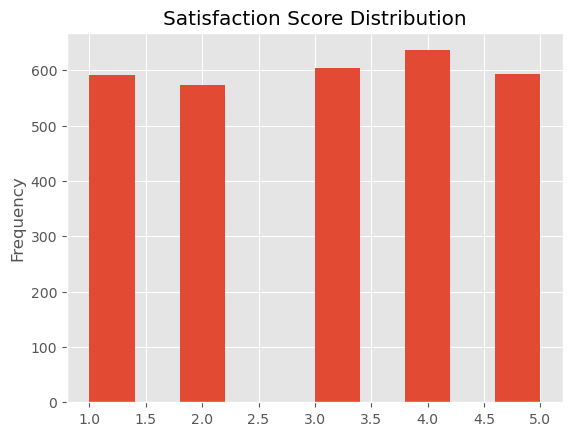

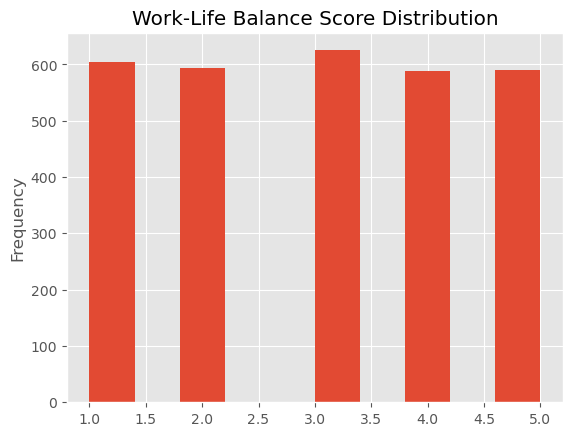

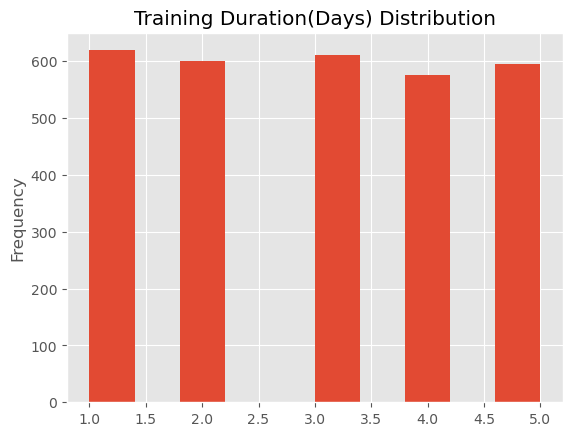

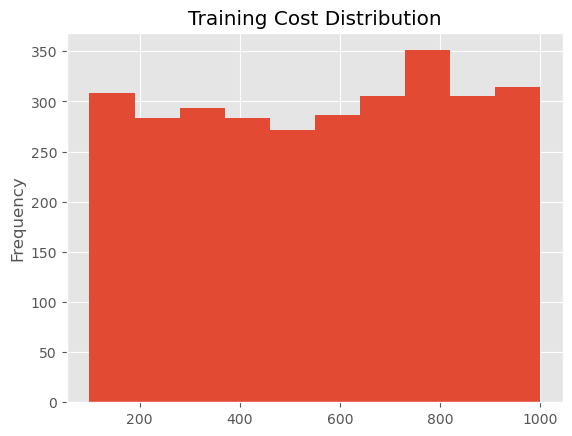

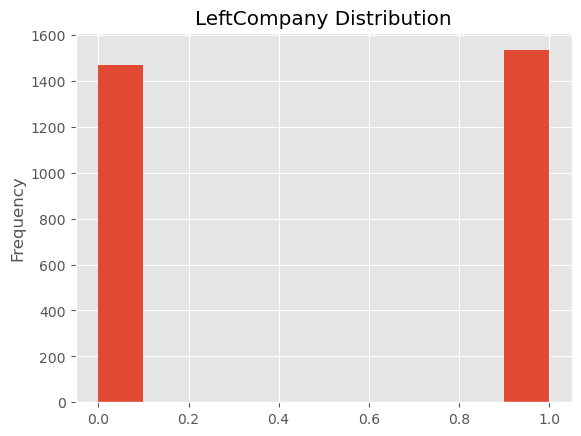

In [11]:
for col in numeric_cols:
    df_merged[col].plot(kind='hist')
    plt.title(col+' Distribution')
    plt.show()

there is only one continious variable (Training Cost) - the rest is discrete / categorical

In [12]:
df_merged['LeftCompany'] = df_merged['LeftCompany'].astype('category')

# Analytics Personnel

Number of currently working employees is 1467


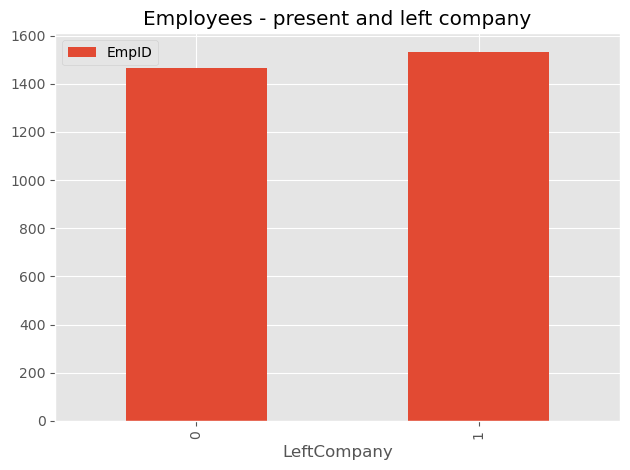

In [13]:
df_active = df_merged[df_merged['LeftCompany']==0].copy()

print('Number of currently working employees is {}'.format(len(df_merged[df_merged['LeftCompany']==0])))

df_merged.groupby('LeftCompany').agg({'EmpID':'count'}).plot(kind='bar')
plt.title('Employees - present and left company')
plt.tight_layout()
plt.show()

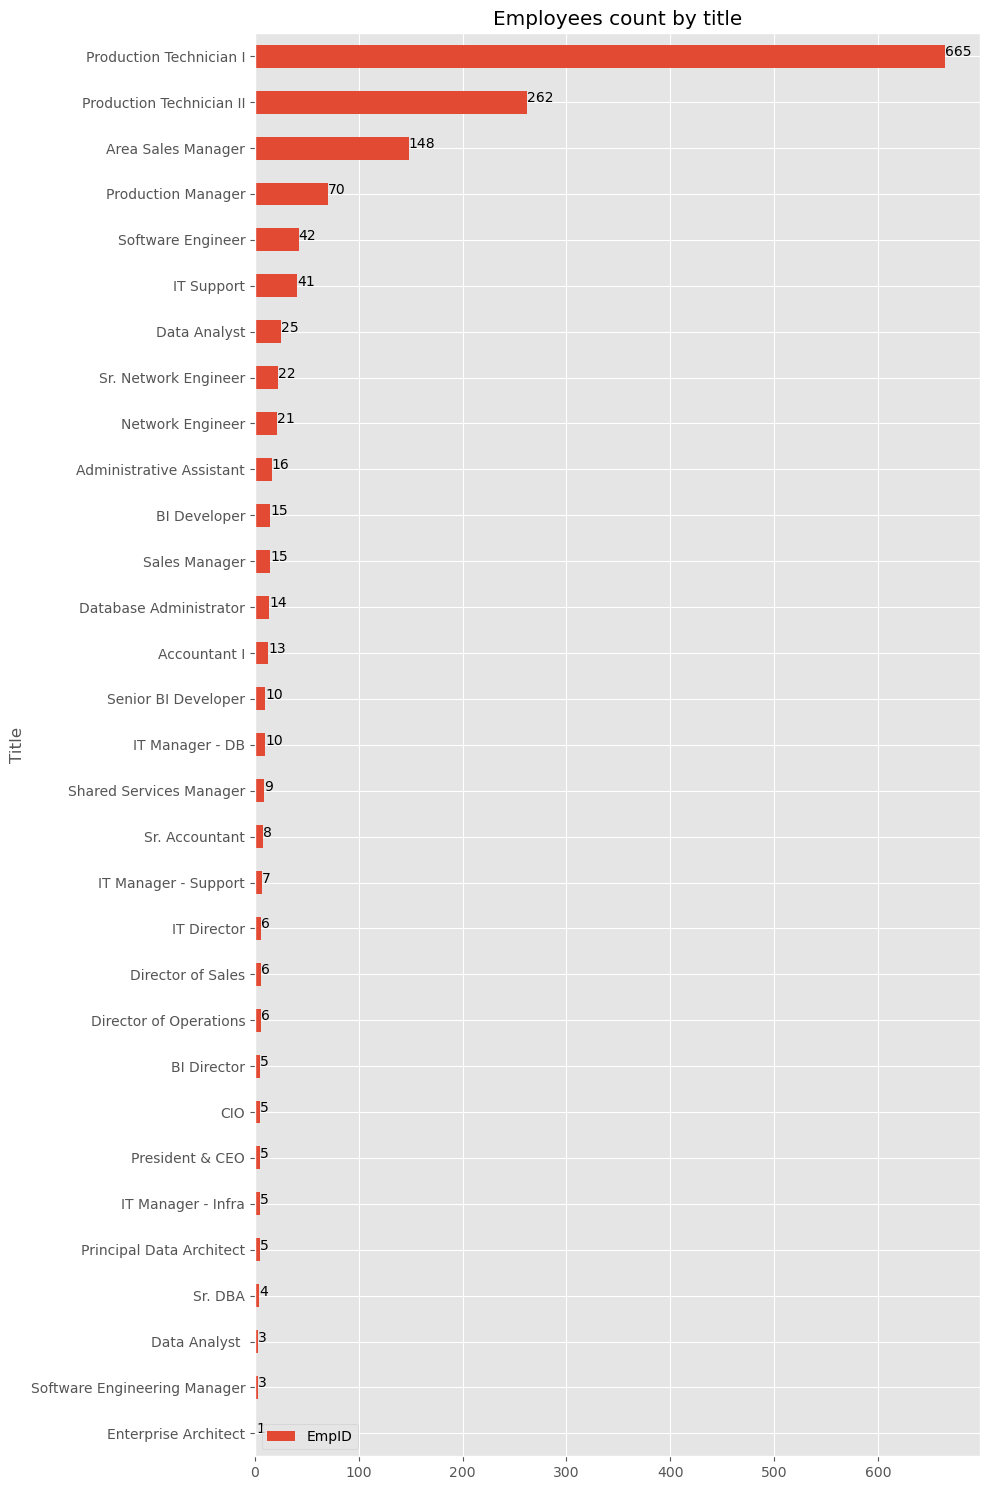

In [14]:
ax = (df_active.groupby('Title').agg({'EmpID':'count'})
      .sort_values(by='EmpID', ascending=True)
      .plot(kind='barh', figsize=(10,15)))

for index, value in enumerate(df_active.groupby('Title').agg({'EmpID':'count'}).sort_values(by='EmpID', ascending=True)['EmpID']):
    ax.text(value, index, str(value))

plt.title('Employees count by title')        
plt.tight_layout()
plt.show()

In [15]:
import datetime as dt

today = dt.datetime.now()

df_active['years in company'] = (df_active['StartDate'].apply(lambda x: (today - x)).dt.days/365).astype('int')

C:\Users\obaliuta\AppData\Local\Temp\ipykernel_3596\1200696623.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_active.corr())


<Axes: >

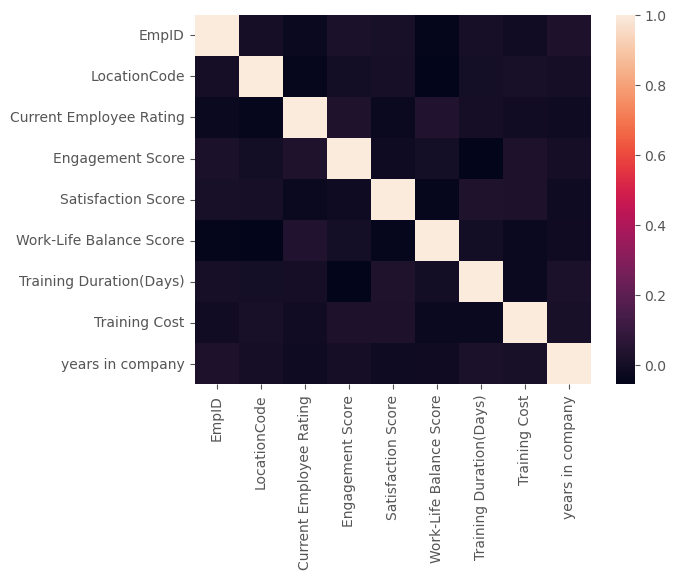

In [16]:
sns.heatmap(df_active.corr())

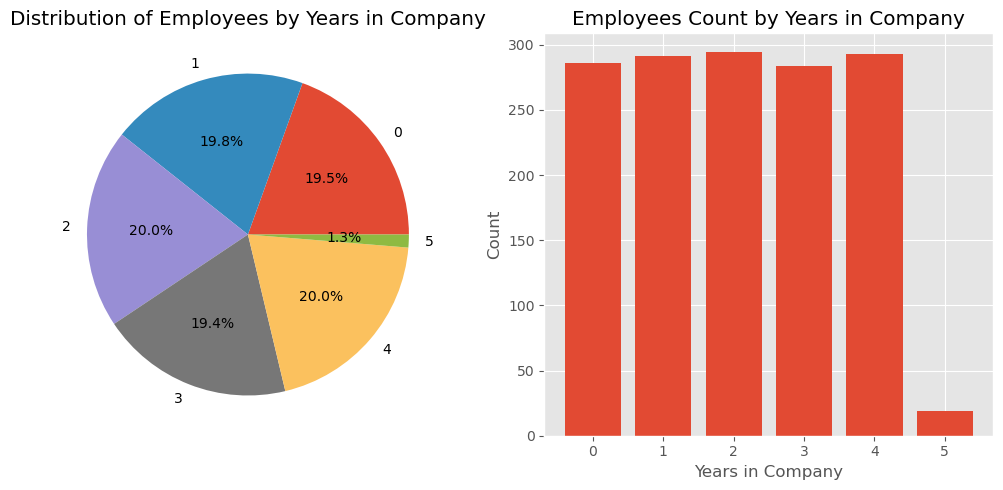

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

data_pie = df_active.groupby('years in company').agg({'EmpID':'count'})
axs[0].pie(data_pie['EmpID'], labels=data_pie.index, autopct='%1.1f%%')
axs[0].set_title('Distribution of Employees by Years in Company')

data_bar = df_active.groupby('years in company').agg({'EmpID':'count'}).sort_values(by='EmpID', ascending=False)
axs[1].bar(data_bar.index, data_bar['EmpID'])
axs[1].set_title('Employees Count by Years in Company')
axs[1].set_xlabel('Years in Company')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

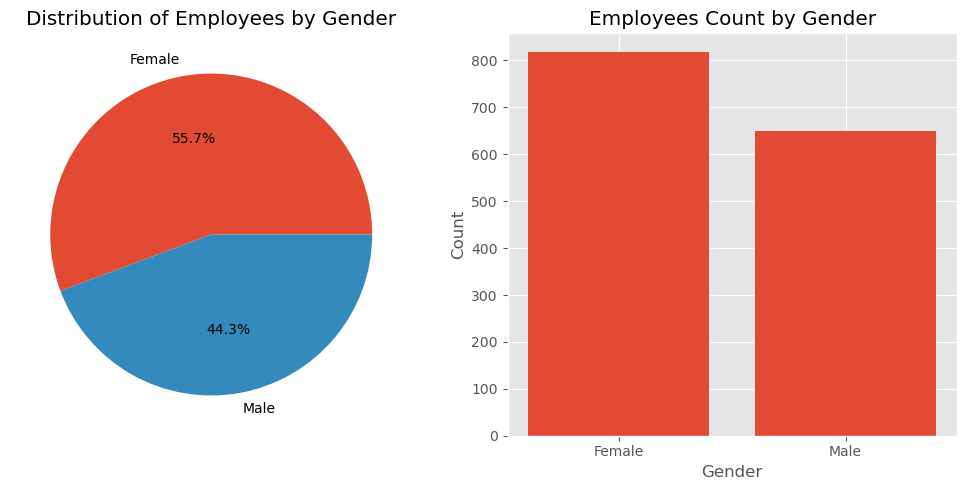

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

data_pie = df_active.groupby('GenderCode').agg({'EmpID':'count'})
axs[0].pie(data_pie['EmpID'], labels=data_pie.index, autopct='%1.1f%%')
axs[0].set_title('Distribution of Employees by Gender')

data_bar = df_active.groupby('GenderCode').agg({'EmpID':'count'}).sort_values(by='EmpID', ascending=False)
axs[1].bar(data_bar.index, data_bar['EmpID'])
axs[1].set_title('Employees Count by Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

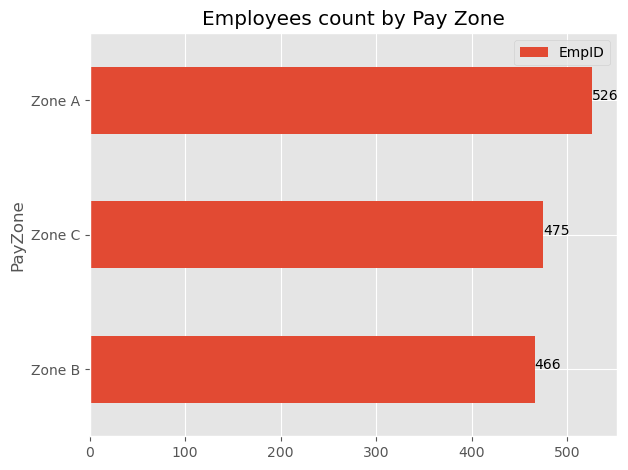

In [19]:
ax = df_active.groupby('PayZone').agg({'EmpID':'count'}).sort_values(by='EmpID', ascending=True).plot(kind='barh')

for index, value in enumerate((df_active.groupby('PayZone')
                               .agg({'EmpID':'count'})
                               .sort_values(by='EmpID', ascending=True)['EmpID'])):
    ax.text(value, index, str(value))

plt.title('Employees count by Pay Zone')        
plt.tight_layout()
plt.show()

In [20]:
df_active.groupby('Title')['PayZone'].unique()

Title
Accountant I                    [Zone A, Zone B, Zone C]
Administrative Assistant        [Zone B, Zone C, Zone A]
Area Sales Manager              [Zone B, Zone A, Zone C]
BI Developer                    [Zone C, Zone B, Zone A]
BI Director                     [Zone A, Zone C, Zone B]
CIO                             [Zone A, Zone B, Zone C]
Data Analyst                    [Zone B, Zone A, Zone C]
Data Analyst                                    [Zone B]
Database Administrator          [Zone C, Zone A, Zone B]
Director of Operations          [Zone B, Zone A, Zone C]
Director of Sales                       [Zone A, Zone B]
Enterprise Architect                            [Zone C]
IT Director                     [Zone C, Zone A, Zone B]
IT Manager - DB                 [Zone A, Zone B, Zone C]
IT Manager - Infra              [Zone A, Zone B, Zone C]
IT Manager - Support            [Zone B, Zone C, Zone A]
IT Support                      [Zone A, Zone C, Zone B]
Network Engineer         

In [21]:
perf_scores = {'Exceeds':4, 'Fully Meets':3, 'Needs Improvement':1, 'PIP':2}

df_active['PerformanceScoreCode'] = df_active['Performance Score'].apply(lambda x: perf_scores[x])

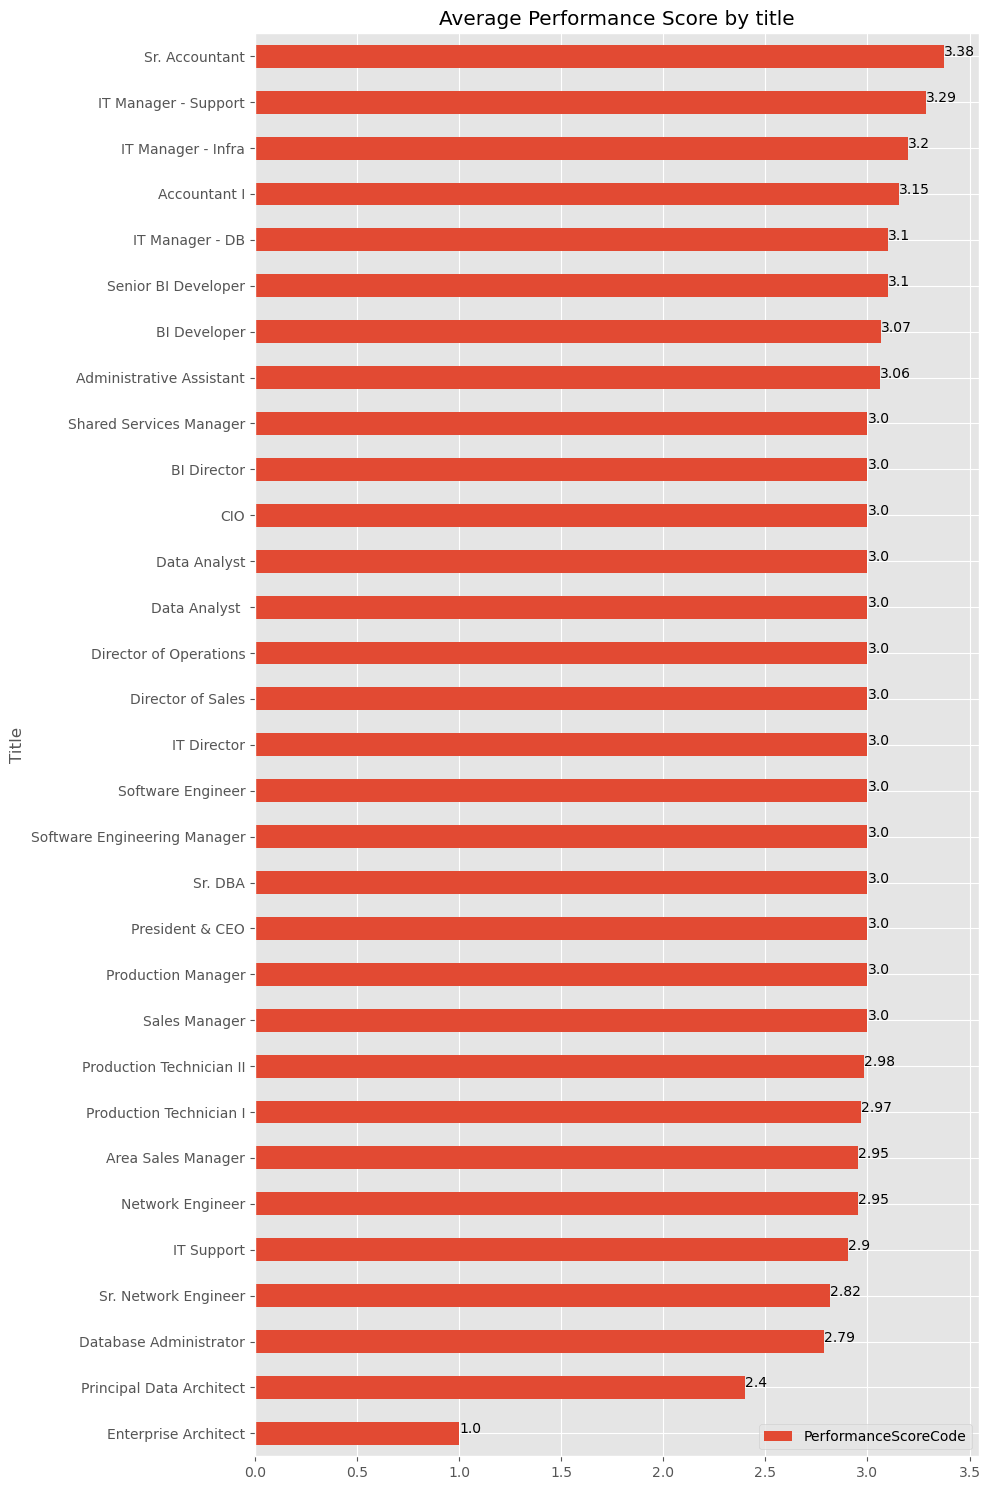

In [22]:
ax = (df_active.groupby('Title')
      .agg({'PerformanceScoreCode':'mean'})
      .sort_values(by='PerformanceScoreCode', ascending=True)
      .plot(kind='barh', figsize=(10,15)))

for index, value in enumerate(df_active.groupby('Title')
                              .agg({'PerformanceScoreCode':'mean'})
                              .sort_values(by='PerformanceScoreCode', ascending=True)['PerformanceScoreCode']):
    ax.text(value, index, str(round(value,2)))

plt.title('Average Performance Score by title')        
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution Performance Score vs Years in Company')

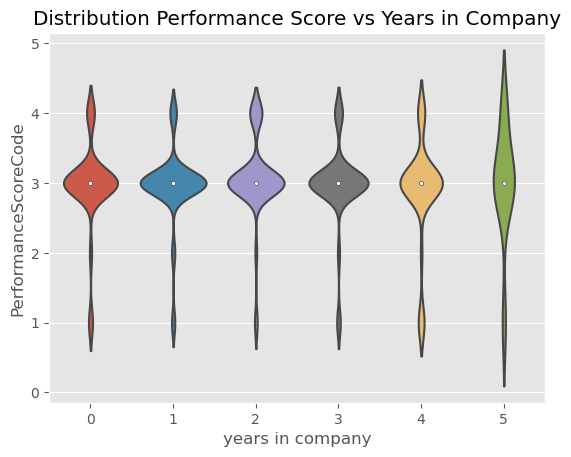

In [23]:
sns.violinplot(x='years in company' , y='PerformanceScoreCode', data=df_active, alpha=0.05)
plt.title('Distribution Performance Score vs Years in Company')

# Analytics Working Conditions

<Figure size 1000x500 with 0 Axes>

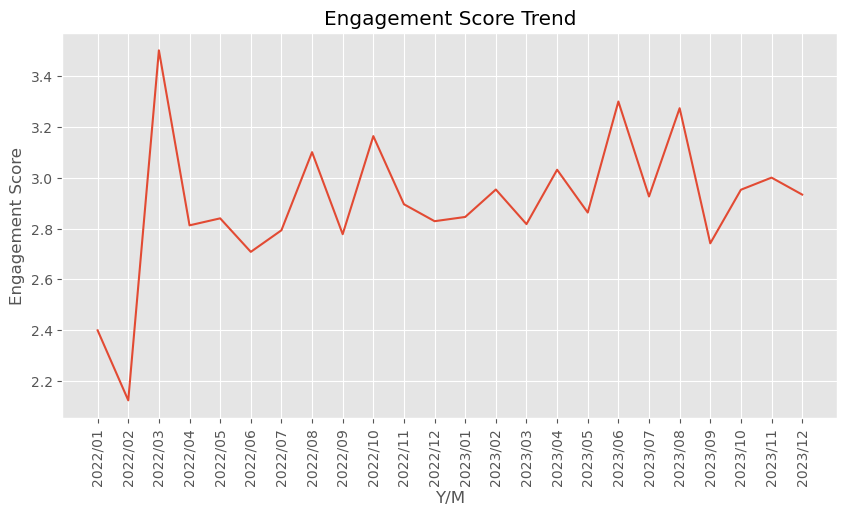

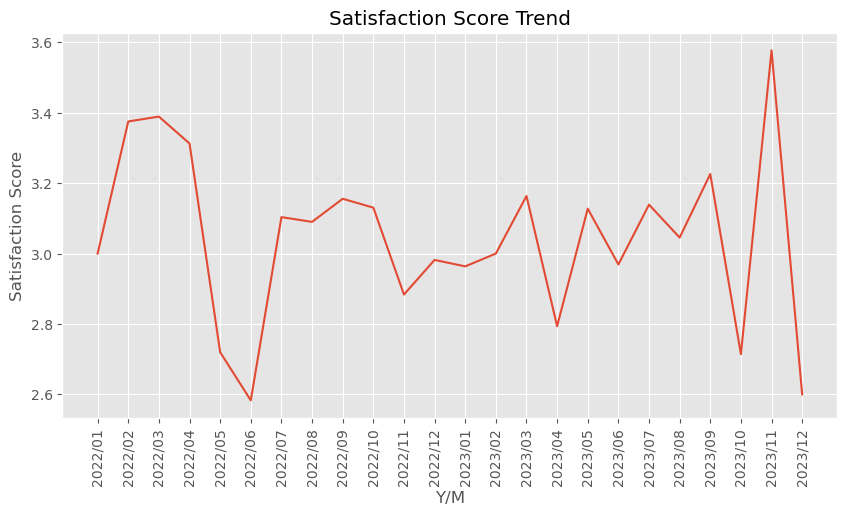

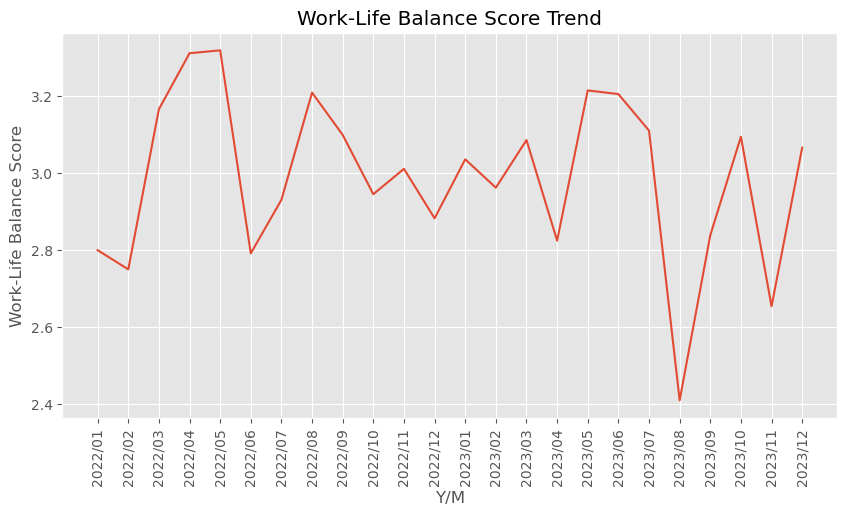

In [24]:
df_active['Y/M'] = df_active['Survey Date'].dt.strftime('%Y/%m')
survey_time = df_active.groupby('Y/M')[['Engagement Score','Satisfaction Score','Work-Life Balance Score']].mean()
plt.figure(figsize=(10, 5))

for i in ['Engagement Score','Satisfaction Score','Work-Life Balance Score']:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='Y/M', y=i, data = survey_time)
    plt.xticks(rotation=90)
    plt.title(i+' Trend')
    plt.show()

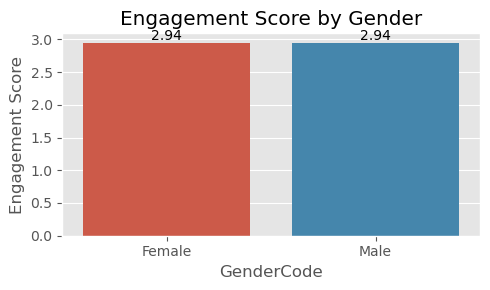

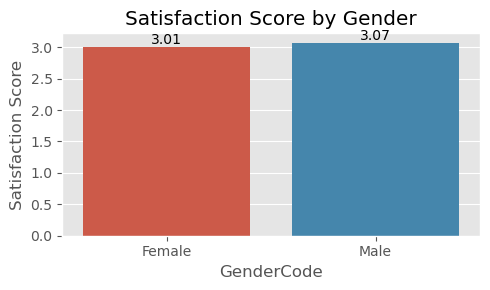

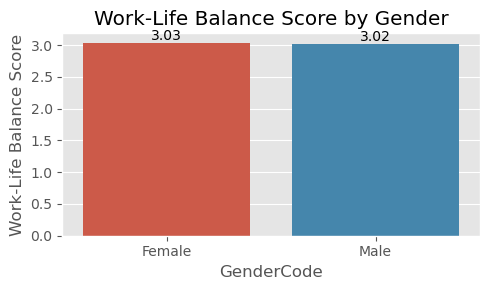

In [25]:
data_cond = (df_active
             .groupby('GenderCode')[['Engagement Score','Satisfaction Score','Work-Life Balance Score']].mean()
             .reset_index())

for i in ['Engagement Score','Satisfaction Score','Work-Life Balance Score']:
    plt.figure(figsize=(5, 3))
    ax = sns.barplot(x='GenderCode', y=i, data=data_cond)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',  # Display value with two decimal places
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    plt.title(i+' by Gender')
    plt.tight_layout()
    plt.show()

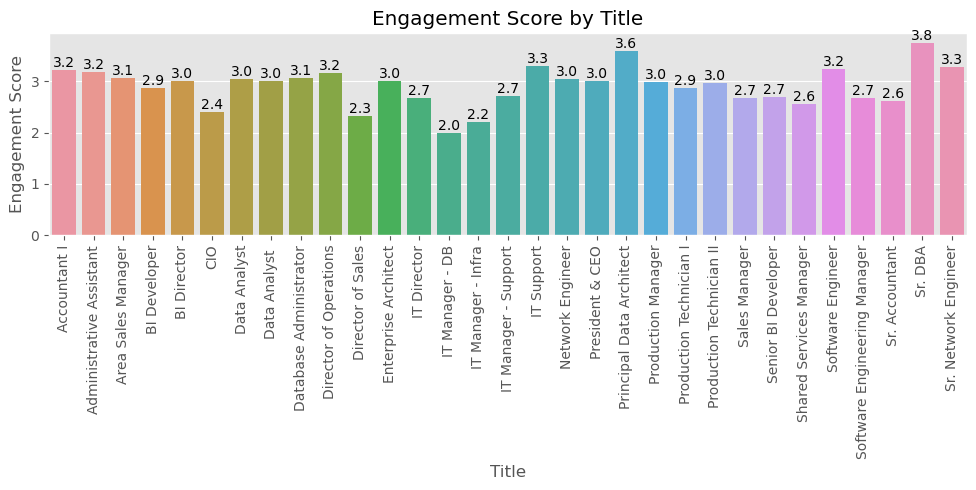

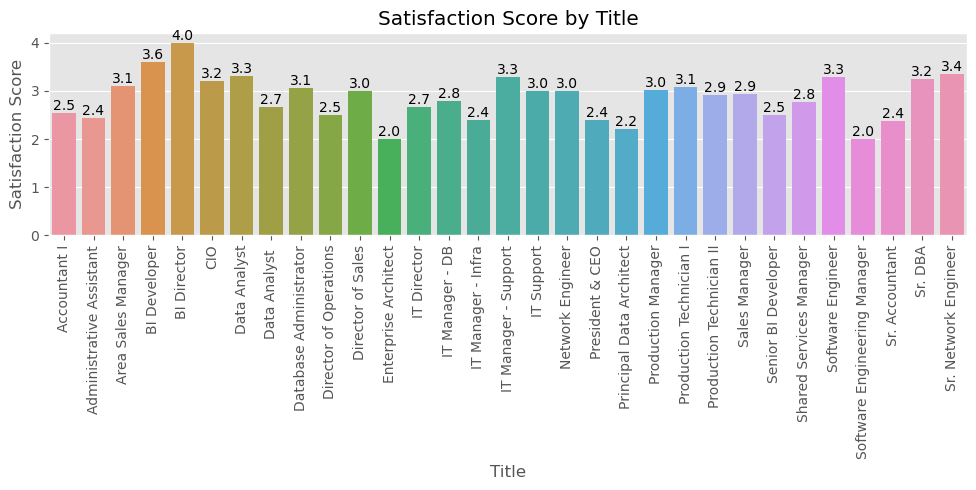

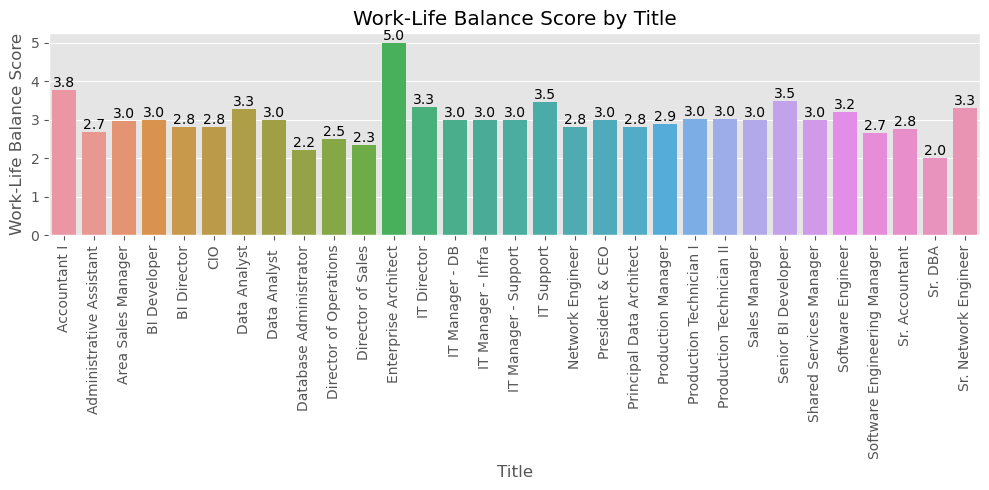

In [26]:
data_cond = (df_active
             .groupby('Title')[['Engagement Score','Satisfaction Score','Work-Life Balance Score']].mean()
             .reset_index())

for i in ['Engagement Score','Satisfaction Score','Work-Life Balance Score']:
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x='Title', y=i, data=data_cond)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',  # Display value with 1 decimal places
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    plt.title(i+' by Title')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

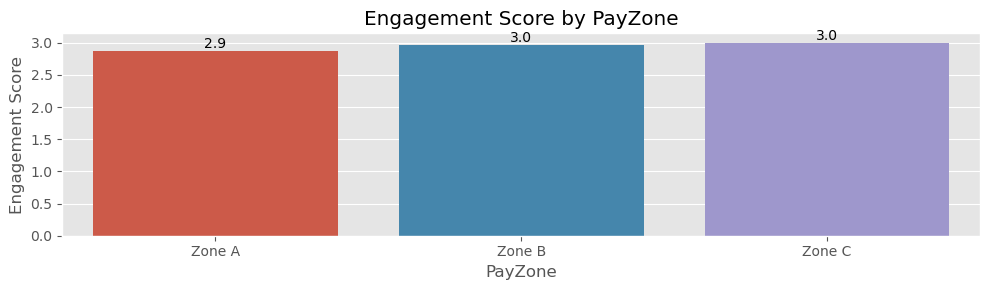

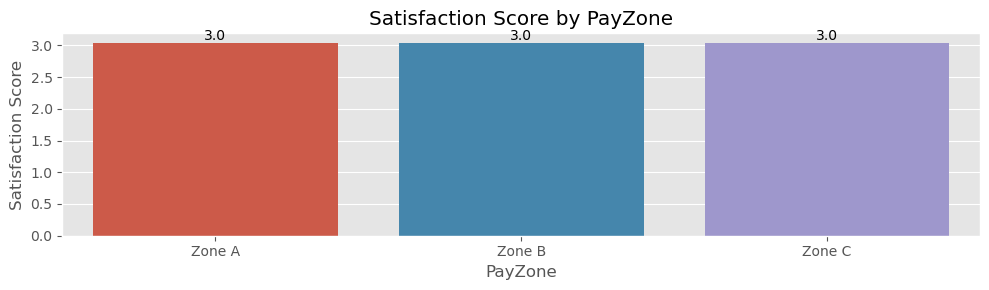

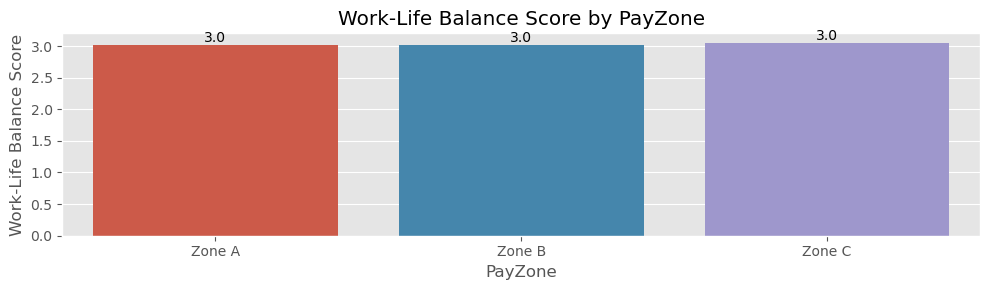

In [27]:
data_cond = (df_active
             .groupby('PayZone')[['Engagement Score','Satisfaction Score','Work-Life Balance Score']].mean()
             .reset_index())

for i in ['Engagement Score','Satisfaction Score','Work-Life Balance Score']:
    plt.figure(figsize=(10, 3))
    ax = sns.barplot(x='PayZone', y=i, data=data_cond)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',  # Display value with 1 decimal places
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
    plt.title(i+' by PayZone')
    plt.tight_layout()
    plt.show()

# Trainings Analytics

In [28]:
df_active.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating', 'Survey Date', 'Engagement Score',
       'Satisfaction Score', 'Work-Life Balance Score', 'Training Date',
       'Training Program Name', 'Training Type', 'Training Outcome',
       'Location', 'Trainer', 'Training Duration(Days)', 'Training Cost',
       'LeftCompany', 'years in company', 'PerformanceScoreCode', 'Y/M'],
      dtype='object')

In [29]:
print("Number of Unique trainings for active users is {}".format(df_active['Training Program Name'].nunique()))

Number of Unique trainings for active users is 5


Avrage Training cost is 557.9116905248807


Text(0.5, 1.0, 'Average Training Cost per Employee')

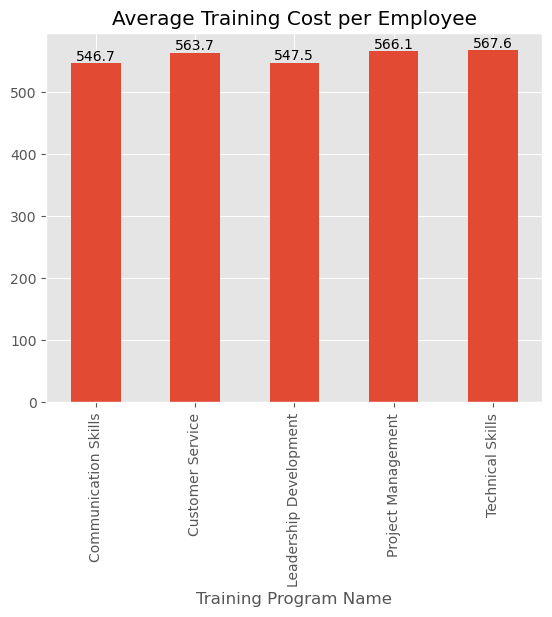

In [30]:
print('Avrage Training cost is {}'.format(df_active['Training Cost'].mean()))

ax = df_active.groupby('Training Program Name')['Training Cost'].mean().plot(kind='bar')

for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',  # Display value with 1 decimal places
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')
plt.title('Average Training Cost per Employee')

In [31]:
# number of active employees taken a particular training program

pd.DataFrame((df_active
              .groupby(['Training Program Name','Title'])
              .agg({'EmpID':'count'}))
              .reset_index()
              .rename(columns={'EmpID':'trainings_no'})
              .pivot(index='Title', columns='Training Program Name', values='trainings_no'))

Training Program Name,Communication Skills,Customer Service,Leadership Development,Project Management,Technical Skills
Title,,,,,
Accountant I,5.0,1.0,2.0,4.0,1.0
Administrative Assistant,3.0,3.0,5.0,4.0,1.0
Area Sales Manager,29.0,29.0,16.0,44.0,30.0
BI Developer,2.0,1.0,3.0,3.0,6.0
BI Director,2.0,NaN,1.0,1.0,1.0
CIO,1.0,1.0,1.0,NaN,2.0
Data Analyst,6.0,5.0,1.0,7.0,6.0
Data Analyst,NaN,1.0,1.0,NaN,1.0
Database Administrator,2.0,1.0,3.0,3.0,5.0
